# DP - Porovnávanie sekvencií pohľadu
### Overenie dataset Alza.sk (Zrucnosti)

In [16]:
%matplotlib notebook
%run ./Functions.ipynb

Inicializacia konstant a ciest k suborom

In [2]:
TASKS = {
    "1":["IE_1.tsv", "1.txt"],
    "2":["IE_2.tsv", "2.txt"],
    "3":["IE_3.tsv", "3.txt"],
    "4":["IE_4.tsv", "4.txt"],
    "5":["IE_5.tsv", "5.txt"],
    "6":["IE_6.tsv", "6.txt"],
    "7":["IE_7.tsv", "7.txt"],
    "8":["IE_8.tsv", "8.txt"]
}
TASK_DATA_NAMES = ["IE_1", "IE_2", "IE_3", "IE_4", "IE_5", "IE_6", "IE_7", "IE_1"]
AOI_DATA_NAMES = ["1.txt","2.txt","3.txt","4.txt","5.txt","6.txt","7.txt","8.txt"]
STUDIO_EVENTS = ['InstructionStart', 'InstructionEnd', 'ScreenRecStarted', 'URLStart', 
                 'URLEnd', 'ScreenRecStopped', 'QuestionStarted','QuestionEnded']


PATH_CALIB_DATA = "../data_zrucnosti/calibration_data_begin/" # tato premenna sa musi takto volat
saved_variables_path = './saved_variables/zrucnosti/'

In [3]:
# Load configuration file
CONFIG_PARSER = ConfigParser()
with codecs.open('config.ini', 'r', encoding='utf-8') as f:
    CONFIG_PARSER.read_file(f)

Inicializacia premennych

In [17]:
# Get all participansts, their names and create instances
ALL_PARTICIPANTS = {}
ALL_PARTICIPANTS_FEATURES_NAMES = []
ALL_PARTICIPANTS_NAMES = [] 
ALL_PARTICIPANTS_AFTER_COMPLETE_CHECK_NAMES = []
DONT_HAVE_ENOUGH_DATA = []
DONT_COMPLETE_TASK = []
DONT_PASS_CALIBRATION = []
DONT_PASS_VALIDATION = []

AOIS = []

Zvolenie ulohy a minimalneho percenta validity dat

In [18]:
TASK_NUMBER = "2"
VALIDITY_PERCENTAGE = 25

Inicialiazacia crt, ktore chceme vyselektovat (podla ich nazvu)

In [19]:
COLUMNS_TO_DROP_0 = ['Name','Scanpath','ScanpathShort', 'FixationsDuration',
                    'MeanLev','MeanLcs','MinLcs','MinLev', 'MaxLcs', 'MaxLev',
                     'NumberOfFixations',  'ReoccurrenceLaminarity', 
                     'RecurrenceMeanX','RecurrenceMeanY', 'AverageSaccadeLength',
                    'NumberOfAoisHits', 'ReoccurrenceDeterminism', 'RecurrenceStandardDeviationY' 
                     ]

__________________________________________

### Výpočet čŕt
Ak už máme črty vypočítané a uložene, nemusíme ich znova počítať a len si ich načítame z časti _Načítanie uložených premenných (vypočítane a uložené črty)_

#### Načítanie datasetu

In [13]:
chosen_task = TASKS[TASK_NUMBER]
DATASET = pd.read_csv("../data_zrucnosti/data_by_tasks/" + chosen_task[0], low_memory=False, sep="\t")
AOIS = ac.load_and_process_aoi("../data_zrucnosti/aois/", chosen_task[1])

# Participanti, ktori nesplnili ulohy (prevzal som to od Mokreho ako to mal on)
DONT_COMPLETE_TASK = CONFIG_PARSER.get('delete', TASK_NUMBER).split("\n")
ALL_PARTICIPANTS_NAMES = DATASET['ParticipantName'].unique()

for tester in ALL_PARTICIPANTS_NAMES:
    ALL_PARTICIPANTS[tester] = Participant(tester)

#### Filtrovanie participantov
Vo vypise vidime, kolko participantov bolo z celkoveho poctu v kazdom kroku vyfiltrovanych

In [14]:
DONT_PASS_CALIBRATION, DONT_PASS_VALIDATION = filter_participants(VALIDITY_PERCENTAGE, True, True, True, 0.85, 0.85)

Calibration filter: 
58 -> 57
Validation filter: 
58 -> 57
Completion filter: 
58 -> 49
Participants after all filtrations: 
58 -> 47


#### Výpočet čŕt pre participantov
Vo vypise vidime postupne pre ktoreho participanta sa pocitaju crty

In [15]:
ALL_PARTICIPANTS_FEATURES_NAMES = set_participants_features()

Working on Tester46
Working on tester48
Working on tester47
Working on tester61
Working on tester54
Working on tester24
Working on tester32
Working on tester14
Working on tester17
Working on tester69
Working on tester13
Working on tester28
Working on tester59
Working on tester22
Working on tester42
Working on tester21
Working on tester68
Working on tester36
Working on tester52
Working on tester07
Working on tester66
Working on tester10
Working on tester26
Working on tester12
Working on tester25
Working on tester33
Working on tester27
Working on tester57
Working on tester11
Working on tester53
Working on tester08
Working on tester51
Working on tester38
Working on tester20
Working on tester58
Working on tester49
Working on tester56
Working on tester64
Working on tester 35
Working on tester60
Working on tester31
Working on tester55
Working on tester34
Working on tester39
Working on tester40
Working on tester09
Working on tester37
-----------------------------------------------------------

Vypisanie celkovo vyfiltrovanych participantov

In [34]:
get_overall_dropouts(ALL_PARTICIPANTS_NAMES)

Overal dropouts: 
Participants who didn't pass through calibration = 1 -> ['tester18']
Participants who didn't complete task = 9 -> ['tester 29', 'tester30', 'tester43', 'tester44', 'tester50', 'tester63', 'tester65', 'tester70', 'tester71']
Participants who didn't pass through validation = 4 -> ['tester66', 'tester41', 'tester52', 'tester58']
Participants who didn't have enough data = 0 -> []
------------------
All Participants who didnt pass = 14 -> ['tester70', 'tester30', 'tester65', 'tester63', 'tester71', 'tester41', 'tester58', 'tester44', 'tester52', 'tester66', 'tester18', 'tester 29', 'tester50', 'tester43']


Uloženie vypočítaných hodnôt ak je potreba

In [ ]:
save_variables(TASK_NUMBER, saved_variables_path)

__________________________

### Načítanie uložených premenných (vypočítane a uložené črty)

V pripade, ze mame data predvypocitane a ulozene (ako ze aj mame) tak ich staci iba nacitat

In [20]:
ALL_PARTICIPANTS, ALL_PARTICIPANTS_FEATURES_NAMES, ALL_PARTICIPANTS_NAMES, \
    ALL_PARTICIPANTS_AFTER_COMPLETE_CHECK_NAMES, DONT_HAVE_ENOUGH_DATA, \
        DONT_COMPLETE_TASK, DONT_PASS_CALIBRATION, DONT_PASS_VALIDATION = load_variables(TASK_NUMBER, saved_variables_path)

______________________________________________

## Identifikácia odľahlých hodnôt

#### Príprava dát

Data sa normalizuju a pripravia sa ako vstup do zlukovacich algoritmov 

In [21]:
X, df_names, df_all_data, df_dropped_columns = prepare_data(ALL_PARTICIPANTS_FEATURES_NAMES, COLUMNS_TO_DROP_0)

#### Zhlukovanie

Pri vizualizaciach vidime participantov rozdelenych do zhlukov. Zhluky su odlisene farbou a pri kazdom 2D bode je prislusne ciselne oznacenie participanta 

K-medoids

Silhouette Coefficient: 0.354


<IPython.core.display.Javascript object>


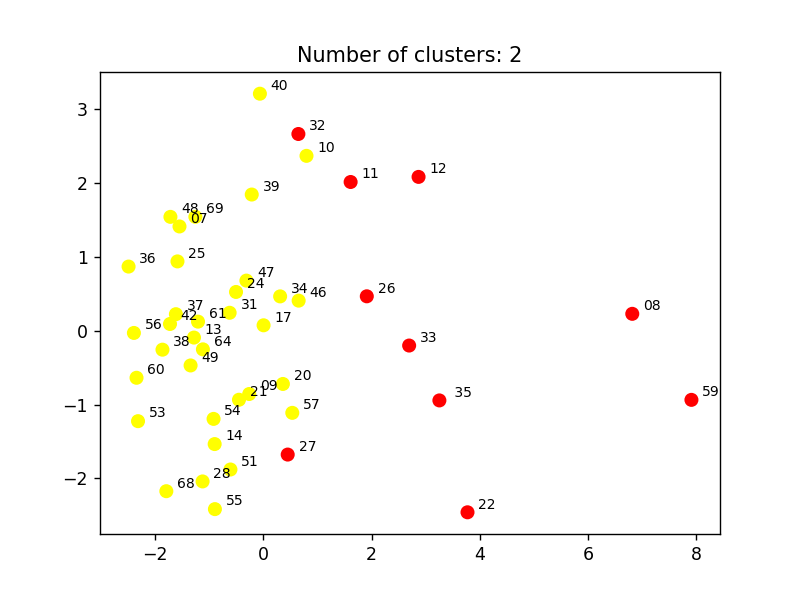

Counter({0: 34, 1: 10})

In [22]:
labels_kmedoids, kmedoids = run_KMEDOIDS(X, df_names,[5,20],6)
collections.Counter(labels_kmedoids)

K-Means

Silhouette Coefficient: 0.396


<IPython.core.display.Javascript object>


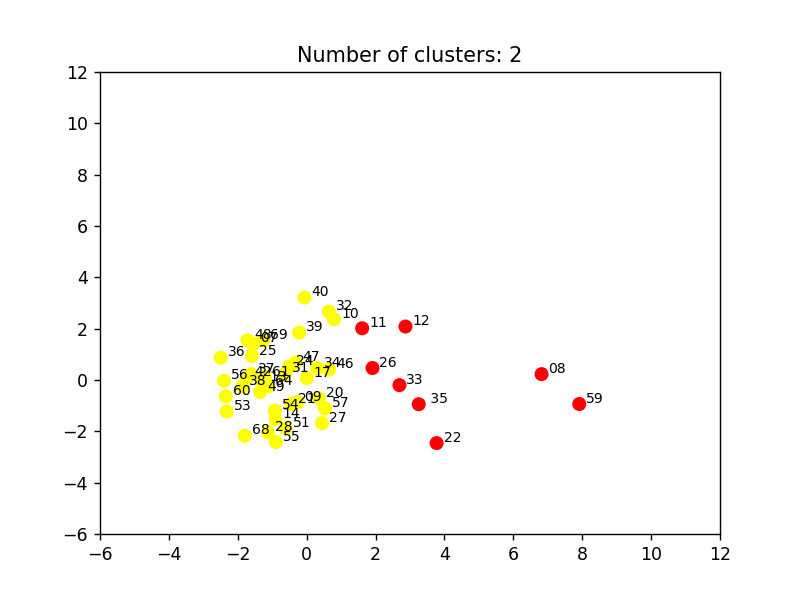

Counter({0: 36, 1: 8})

In [23]:
labels_kmeans, kmeans = run_KMEANS(X, df_names,2, 6)
collections.Counter(labels_kmeans)

#### Dôležitosť čŕt

Vizualizovana je prenasobena dolezitost crt (dokopy 100 percent)

Feature ranking:
1. feature 3, NumberOfAoisHitsShort (0.311766)
2. feature 2, DTW (0.254037)
3. feature 4, Recurrence (0.111804)
4. feature 9, ReoccurrenceRate (0.092764)
5. feature 6, RecurrenceStandardDeviationX (0.087827)
6. feature 7, Reoccurrence (0.075336)
7. feature 1, AverageSaccadeSpeed (0.034036)
8. feature 0, AverageFixationDuration (0.014179)
9. feature 8, ReoccurrenceCORM (0.012369)
10. feature 5, RecurrenceRate (0.005882)


<IPython.core.display.Javascript object>


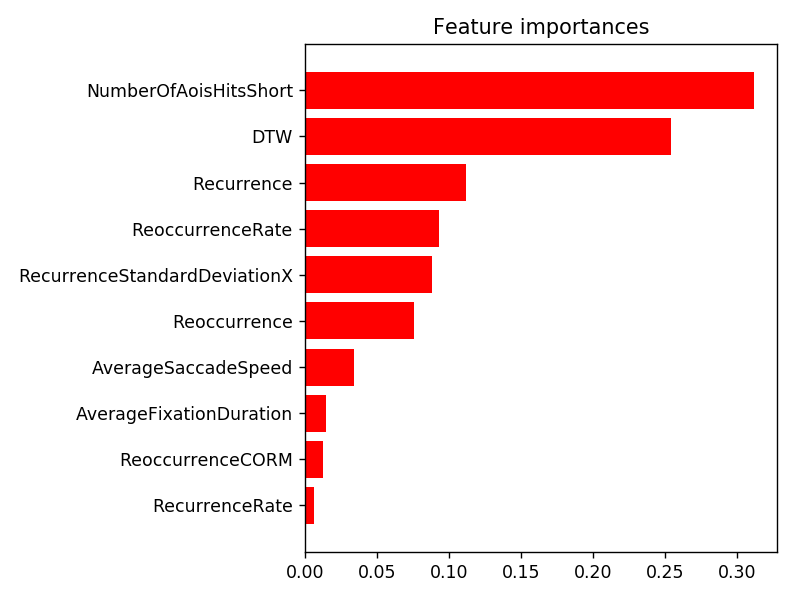

In [24]:
fu = featureImportance(X,labels_kmedoids,df_dropped_columns,300, 1)

#### Rozdelenie dát do dvoch zhlukov

In [25]:
cluster_0, cluster_1 = split_data_to_2_clusters(labels_kmedoids, df_names, df_all_data)
#cluster_0, cluster_1 = split_data_to_2_clusters(labels_kmeans, df_names, df_all_data) # v pripade ze chceme zhluk z k-means

X_cluster_0, df_names_cluster_0, df_all_data_cluster_0, df_dropped_cluster_0 = prepare_data(cluster_0["Name"], COLUMNS_TO_DROP_0)
X_cluster_1, df_names_cluster_1, df_all_data_cluster_1, df_dropped_cluster_1 = prepare_data(cluster_1["Name"], COLUMNS_TO_DROP_0)

#### Spustenie algoritmu LOF pre rôzne _k_ a vypísanie odľahlých hodnôt 

Zvolenie intervalu pre algoritmus LOF Na základe rozdelenia do zhlukov pre úlohu prebehne vo funkcii na základe zvolenia či ide alebo nejde o zhluk, rovnako zvolíme aj počet odľahlých hodnôt ktoré chceme nájsť

1) Nad celym datasetom pustim LOF  
2) Nad jednotlivymi zhlukmi pustim LOF

Vo vypise potom vidime konkretnu metriku a potencionalne odlahle hodnoty podla mennych oznaceni participantov

Nad celým datasetom

In [26]:
outliers_minkowski = get_outliers(X, df_names, False, "minkowski", 2)
outliers_correlation = get_outliers(X, df_names, False, "correlation", 2)

** minkowski **
Outliers in data -> ['tester59', 'tester08']
** correlation **
Outliers in data -> ['tester26', 'tester12']


Nad zhlukmi

In [27]:
print("Cluster " + str(len(df_names_cluster_0)) + " participants ")
outliers_minkowski_cluster_0 = get_outliers(X_cluster_0, df_names_cluster_0, True, "minkowski", 1)
outliers_correlation_cluster_0 = get_outliers(X_cluster_0, df_names_cluster_0, True, "correlation", 1)

print("_________________________________________________")

print("Cluster " + str(len(df_names_cluster_1)) + " participants ")
outliers_minkowski_cluster_1 = get_outliers(X_cluster_1, df_names_cluster_1, True, "minkowski", 1)
outliers_correlation_cluster_1 = get_outliers(X_cluster_1, df_names_cluster_1, True, "correlation", 1)

Cluster 34 participants 
** minkowski **
Outliers in data -> ['tester10', 'tester57', 'tester40']
** correlation **
Outliers in data -> ['tester47', 'tester31']
_________________________________________________
Cluster 10 participants 
** minkowski **
Outliers in data -> ['tester59']
** correlation **
Outliers in data -> []


_Zoradení participanti na základe dĺžky plnenia úlohy - trvania fixácií_  
Trvanie plnenia uloh je v sekundach

In [28]:
potencial_outliers_standard = get_data_sorted_by(df_all_data, "FixationsDuration")
potencial_outliers_standard

,FixationsDuration,Name
17,3.302,tester36
1,4.755,tester48
36,5.222,tester60
41,5.974,tester40
30,6.758,tester38
27,7.974,tester53
43,8.508,tester37
5,8.553,tester24
15,8.948,tester21
19,9.657,tester10


### Vizualizácia dát

#### LOF algoritmus so skóre odľahlosti

Datove body su participanti, cerveny kruh znaci stupen odlahlosti (cim vacsi tym vacsie skore) a pri jednotlivych bodoch su aj ciselne oznacenia participantov

<IPython.core.display.Javascript object>


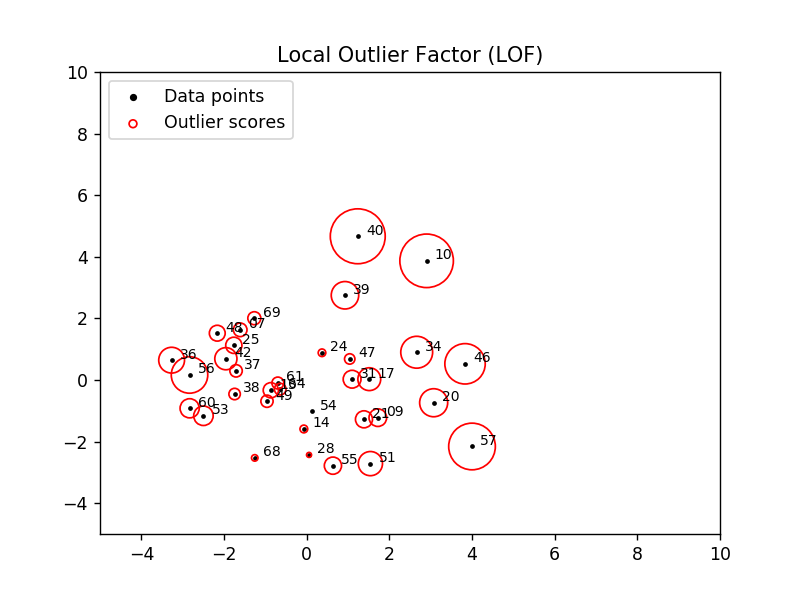

In [29]:
sc, lf = run_LOF(X_cluster_0, df_names_cluster_0, 20, "minkowski", True, True, -5,10)

#### Vizualizácia scanpathov a porovnanie sekvencií participantov

Modrou farbou je oznaceny participant p1
Cervenou farbou je oznaceny participant p2

Pod vizualizaciami su zobrazene vsetky ich vypocitane crty

<IPython.core.display.Javascript object>


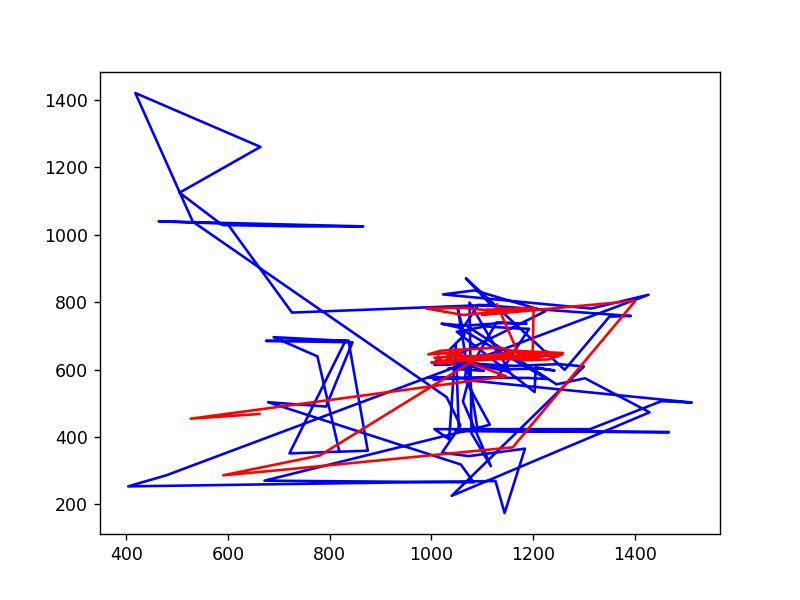

{'Name': 'tester26', 'Scanpath': 'DDDDDDDDDDDEEDEEFFFEEEEEEEEEFEEEEFFFFFFFFFDDECEEEEEDHGDDDDDDDFFFFFFFFFFFFFFFFFFEFFFFEEEEEEFFFEEEEFFFFFFFF', 'ScanpathShort': 'DEDEFEFEFDECEDHGDFEFEFEF', 'NumberOfAoisHits': 105, 'NumberOfAoisHitsShort': 24, 'NumberOfFixations': 111, 'FixationsDuration': 21.85, 'AverageFixationDuration': 0.19684684684684686, 'AverageSaccadeSpeed': 0.7828021326494118, 'AverageSaccadeLength': 185.56837901287372, 'Reoccurrence': 329, 'ReoccurrenceRate': 5.389025389025389, 'ReoccurrenceDeterminism': 0.303951367781155, 'ReoccurrenceLaminarity': 0.303951367781155, 'ReoccurrenceCORM': -21.240674219397622, 'Recurrence': 2667.0, 'RecurrenceRate': 0.4702874272615059, 'RecurrenceMeanX': 46.252343457067866, 'RecurrenceMeanY': 80.94600674915635, 'RecurrenceStandardDeviationX': 281.05957223833803, 'RecurrenceStandardDeviationY': 483.6707462894608, 'DTW': 28191.764490943544, 'MaxLcs': 0.7916666666666666, 'MeanLcs': 0.4505813953488372, 'MinLcs': 0.16666666666666666, 'MaxLev': 40, 'Mean

In [30]:
p1 = "tester26"
p2 = "tester28"
plot_participant_fixations_to_aoi(p1, False, p2)

print(ALL_PARTICIPANTS[p1].data)
print("\n")
print(ALL_PARTICIPANTS[p2].data)

<IPython.core.display.Javascript object>


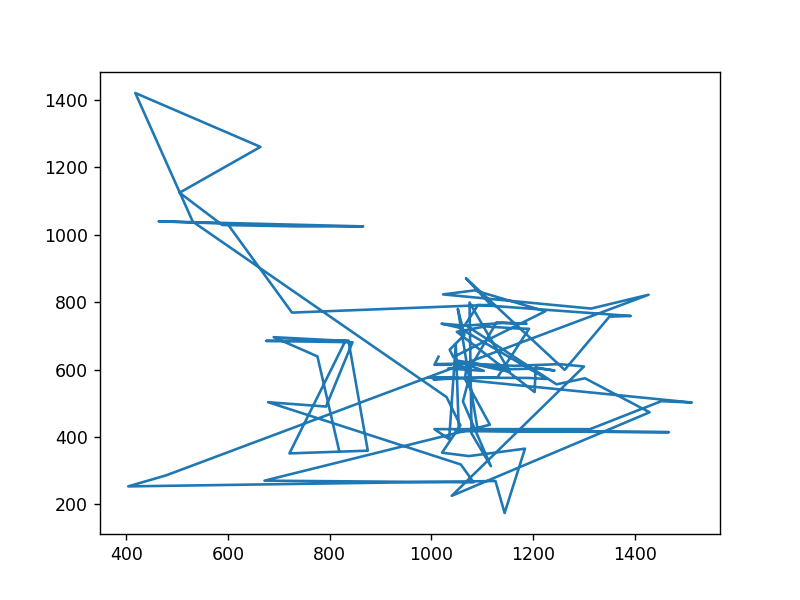

In [31]:
# Zvlast pre participanta P1
plot_participant_fixations_to_aoi(p1, True)

<IPython.core.display.Javascript object>


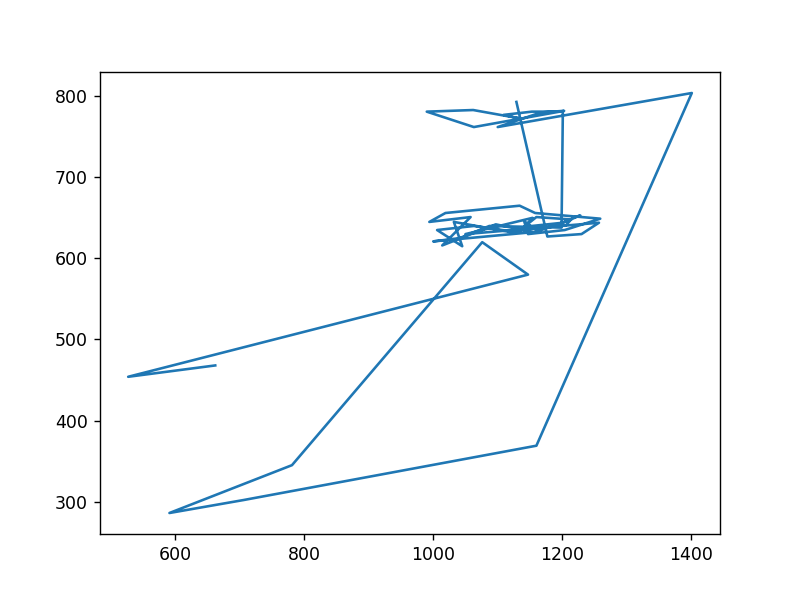

In [32]:
# Zvlast pre participanta P2
plot_participant_fixations_to_aoi(p2, True)

Korelačná matica čŕt

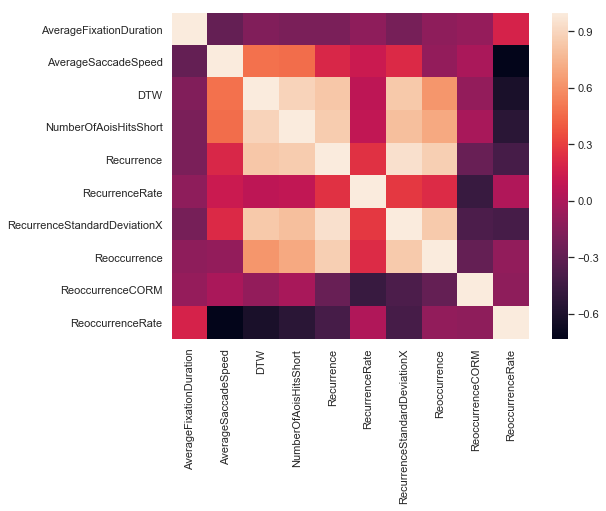

In [33]:
%matplotlib inline
get_correlation_matrix(df_dropped_columns)